In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np


<AxesSubplot:xlabel='X', ylabel='Y'>

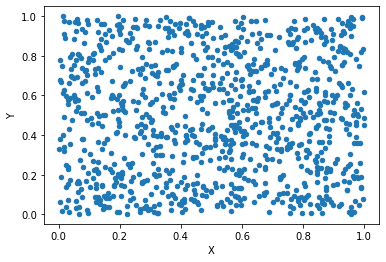

In [2]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy.X = X
df_xy.Y = Y
df_xy.plot(x="X",y = "Y",kind="scatter")

In [3]:

X = np.random.uniform(0,1,1000)
X

array([6.24914792e-01, 8.47465365e-01, 7.35226905e-01, 1.83804748e-01,
       5.94530286e-01, 2.76632592e-01, 5.93905336e-01, 9.22908082e-01,
       3.61543506e-01, 4.99977301e-01, 5.06333786e-01, 6.34386749e-01,
       5.45168031e-01, 2.92167140e-01, 2.80385346e-02, 9.37131077e-01,
       1.86477975e-01, 9.58629122e-01, 5.15369355e-01, 7.05701273e-01,
       7.55574146e-01, 9.28970622e-01, 8.86736680e-01, 1.12914371e-01,
       3.95745027e-03, 3.25204738e-01, 4.44381909e-01, 5.21271240e-01,
       9.59969927e-01, 7.31777744e-01, 7.96296119e-01, 3.25511089e-01,
       5.01420672e-01, 3.87017491e-01, 4.34239899e-01, 3.66439519e-01,
       8.85818312e-01, 1.04350010e-01, 1.91815202e-01, 8.34482268e-01,
       5.13883324e-01, 6.04529564e-01, 3.02091636e-01, 3.33783027e-01,
       3.62823061e-01, 7.86326906e-01, 1.40578641e-01, 6.05495204e-01,
       1.00475004e-01, 2.01250006e-01, 1.87653504e-01, 6.42861069e-01,
       1.68772119e-01, 7.07125461e-01, 4.70106060e-01, 9.48470210e-01,
      

<AxesSubplot:xlabel='X', ylabel='Y'>

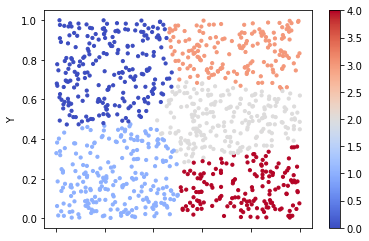

In [4]:
model1 = KMeans(n_clusters=5).fit(df_xy)

df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)


In [5]:
Univ = pd.read_csv("Universities.csv")

In [7]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Univ.iloc[:,1:])


df_norm.head(10)  # Top 10 rows


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


In [7]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=5) 
model.fit(df_norm)

model.labels_ # getting the labels of clusters assigned to each row 

array([1, 3, 4, 1, 1, 2, 2, 1, 2, 3, 2, 1, 1, 0, 2, 0, 2, 0, 1, 1, 4, 1,
       1, 0, 2])

In [8]:
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
Univ['clust']=md # creating a  new column and assigning it to new column 
df_norm.head()


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


In [9]:
Univ.iloc[:,1:7].groupby(Univ.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
1,1271.000000,81.500000,35.400000,12.900000,23380.000000,89.400000
2,1363.571429,91.428571,21.428571,10.571429,35475.142857,94.571429
3,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000
4,1220.000000,63.500000,63.500000,12.500000,20248.000000,78.500000
